
# Projeto 1 - Redes Sociais

## Criação de Modelos

## Alunos

<table>
  <tr>
    <td align="center"><a href="https://github.com/DaviReisVieira"><img style="border-radius: 50%;" src="https://github.com/DaviReisVieira.png" width="100px;" alt=""/><br /><sub><b>Davi Reis Vieira</b></sub></a><br /><a href="https://github.com/DaviReisVieira" title="Davi Reis Vieira">O Cara -1</a></td>
    <td align="center"><a href="https://github.com/guishas"><img style="border-radius: 50%;" src="https://github.com/guishas.png" width="100px;" alt=""/><br /><sub><b>Guilherme Lunetta</b></sub></a><br /><a href="https://github.com/guishas" title="Guilherme Lunetta">O cara 0</a></td>
    <td align="center"><a href="https://github.com/josermf2"><img style="border-radius: 50%;" src="https://github.com/josermf2.png" width="100px;" alt=""/><br /><sub><b>José Fernandes</b></sub></a><br /><a href="https://github.com/josermf2" title="José Fernandes">O cara +1</a></td>
  </tr>
</table>

## Importando o dataset

- Importando bibliotecas

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('reviews_july.csv')
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,True,0,0,...,True,False,False,76561198074616040,148,12,29259.0,0.0,18588.0,1.597875e+09
1,292030,The Witcher 3: Wild Hunt,73576952,brazilian,Não tenho palavras para dizer como esse jogo e...,2020-07-31 20:46:46,2020-07-31 20:48:04,True,1,0,...,True,False,False,76561198120075031,38,9,4389.0,0.0,4389.0,1.557089e+09
2,292030,The Witcher 3: Wild Hunt,73575959,brazilian,Epic,2020-07-31 20:17:38,2020-07-31 20:17:38,True,0,0,...,True,False,False,76561198101494872,25,1,6653.0,0.0,4136.0,1.608502e+09
3,292030,The Witcher 3: Wild Hunt,73575666,brazilian,"Melhor jogo do fucking universo, compre isso e...",2020-07-31 20:09:24,2020-07-31 20:09:24,True,1,0,...,True,False,False,76561198032616918,80,2,24894.0,0.0,18568.0,1.608581e+09
4,292030,The Witcher 3: Wild Hunt,73574848,brazilian,Um dos melhores games já feito.,2020-07-31 19:45:16,2020-07-31 19:45:16,True,1,0,...,True,False,False,76561198276339634,37,4,7796.0,0.0,7755.0,1.596227e+09


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          80068 non-null  int64  
 1   app_name                        80068 non-null  object 
 2   review_id                       80068 non-null  int64  
 3   language                        80068 non-null  object 
 4   review                          80025 non-null  object 
 5   timestamp_created               80068 non-null  object 
 6   timestamp_updated               80068 non-null  object 
 7   recommended                     80068 non-null  bool   
 8   votes_helpful                   80068 non-null  int64  
 9   votes_funny                     80068 non-null  int64  
 10  weighted_vote_score             80068 non-null  float64
 11  comment_count                   80068 non-null  int64  
 12  steam_purchase                  

## Tratando os dados

In [46]:
df.columns = df.columns.str.replace('.', '_')

/tmp/ipykernel_213/2262415099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


- Convertendo a coluna `recommended` para inteiro

In [47]:
df['recommended'] = df['recommended'].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          80068 non-null  int64  
 1   app_name                        80068 non-null  object 
 2   review_id                       80068 non-null  int64  
 3   language                        80068 non-null  object 
 4   review                          80025 non-null  object 
 5   timestamp_created               80068 non-null  object 
 6   timestamp_updated               80068 non-null  object 
 7   recommended                     80068 non-null  int64  
 8   votes_helpful                   80068 non-null  int64  
 9   votes_funny                     80068 non-null  int64  
 10  weighted_vote_score             80068 non-null  float64
 11  comment_count                   80068 non-null  int64  
 12  steam_purchase                  

## Criando a variável de controle `Nível de Positividade por Usuário`

In [49]:
df['level_of_positivite'] = df.groupby('author_steamid')['recommended'].transform(lambda x: x.sum() / x.count())

## Carregando a rede criada previamente

In [36]:
import netpixi

from netpixi.integration.gt import *
from regression.integration.gt import *

g = gt_load('reviews_july.net.gz')

# p = gt_draw.sfdp_layout(g)
# gt_move(g, p)
# gt_save(g, 'reviews_july_render.net.gz')
r = netpixi.render('reviews_july_render.net.gz')

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


## Criando métricas de rede Centro-Periferia

Para identificar centro e periferia de um grafo, podemos usar a biblioteca [cpnet](https://github.com/skojaku/core-periphery-detection) em conjunto com o módulo spectral da graph_tool.

In [2]:
import cpnet

from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/joblib/backports.py:22: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils  # noqa
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name + "_r", _cmap_r)


In [3]:
matrix = spectral.adjacency(g)

In [4]:
algorithm = cpnet.Rombach()
algorithm.detect(matrix)
c = algorithm.get_coreness()

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [37]:
g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)

In [26]:
for v in g.all_vertices():
    r.vertex(v['id'], size=(5 + 20 * v['coreness']))

- Função para criar métrica `Centro-periferia`

In [50]:
df_copy = df.copy()

In [40]:
data = gt_data(g)
data = data[['coreness']]
data

,coreness
id,
76561197961125336,0.052776
76561198113760204,0.214889
76561198170383927,0.206441
76561198294691999,0.241990
76561198847794289,0.228604
...,...
76561198833339209,0.019750
76561199063233814,0.007735
76561198978646127,0.008942


In [57]:
data_df = pd.DataFrame(data)
data_df = df_copy.merge(data, left_on=['author_steamid'],right_on=['id'])
data_df

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,written_during_early_access,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,1,0,0,...,False,76561198074616040,148,12,29259.0,0.0,18588.0,1.597875e+09,1.0,0.002414
1,268500,XCOM 2,73193028,brazilian,"While i did not play the Vanilla game, War of ...",2020-07-24 04:42:09,2020-07-24 04:42:09,1,0,0,...,False,76561198074616040,148,12,9464.0,0.0,9251.0,1.596595e+09,1.0,0.002414
2,292030,The Witcher 3: Wild Hunt,73557216,brazilian,A Mona Lisa dos jogos.,2020-07-31 11:41:40,2020-07-31 11:41:40,1,1,0,...,False,76561198140909430,75,14,25779.0,0.0,25779.0,1.592863e+09,1.0,0.236669
3,381210,Dead by Daylight,73557284,brazilian,"Bom demais. ""Depois de um tempo você para de l...",2020-07-31 11:43:25,2020-07-31 11:43:25,1,1,0,...,False,76561198140909430,74,14,21709.0,41.0,16187.0,1.610659e+09,1.0,0.236669
4,242760,The Forest,73557449,brazilian,Um dos melhores jogos de sobrevivência que jog...,2020-07-31 11:49:38,2020-07-31 11:49:38,1,0,0,...,False,76561198140909430,74,14,11086.0,0.0,11086.0,1.574923e+09,1.0,0.236669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14227,493340,Planet Coaster,33727570,brazilian,O Jogo é incrível Mas....\n\n\n\nO jogo é perf...,2017-07-22 19:04:47,2017-07-22 19:04:47,1,3,0,...,True,76561198010564777,143,3,6427.0,0.0,5159.0,1.595204e+09,1.0,0.003401
14228,524220,NieR:Automata™,33755158,brazilian,Analise nada técnica:\n\nJogo emocionante do c...,2017-07-23 23:28:58,2017-07-23 23:28:58,1,4,0,...,True,76561198058341612,224,6,5907.0,0.0,5404.0,1.604038e+09,0.5,0.075379
14229,39210,FINAL FANTASY XIV Online,33687274,brazilian,"Pois bem, comecei a jogar o A realm reborn ass...",2017-07-21 03:14:48,2017-07-21 03:14:48,0,40,0,...,False,76561198058341612,224,6,106137.0,0.0,80178.0,1.523712e+09,0.5,0.075379
14230,731490,Crash Bandicoot™ N. Sane Trilogy,43255780,brazilian,Sou muito suspeito pra falar de Crash em qualq...,2018-07-02 22:34:47,2018-11-22 00:40:53,1,4,0,...,False,76561198033637181,136,13,1259.0,0.0,1182.0,1.594228e+09,1.0,0.013386


In [58]:
data_df.to_csv('reviews_july_with_coreness.csv', index=False)

------------------

## Realizando as regressões e salvando os resultados

In [2]:
import regression as reg

In [3]:
data_df = pd.read_csv('reviews_july_with_coreness.csv')
data_df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,written_during_early_access,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,1,0,0,...,False,76561198074616040,148,12,29259.0,0.0,18588.0,1.597875e+09,1.0,0.002414
1,268500,XCOM 2,73193028,brazilian,"While i did not play the Vanilla game, War of ...",2020-07-24 04:42:09,2020-07-24 04:42:09,1,0,0,...,False,76561198074616040,148,12,9464.0,0.0,9251.0,1.596595e+09,1.0,0.002414
2,292030,The Witcher 3: Wild Hunt,73557216,brazilian,A Mona Lisa dos jogos.,2020-07-31 11:41:40,2020-07-31 11:41:40,1,1,0,...,False,76561198140909430,75,14,25779.0,0.0,25779.0,1.592863e+09,1.0,0.236669
3,381210,Dead by Daylight,73557284,brazilian,"Bom demais. ""Depois de um tempo você para de l...",2020-07-31 11:43:25,2020-07-31 11:43:25,1,1,0,...,False,76561198140909430,74,14,21709.0,41.0,16187.0,1.610659e+09,1.0,0.236669
4,242760,The Forest,73557449,brazilian,Um dos melhores jogos de sobrevivência que jog...,2020-07-31 11:49:38,2020-07-31 11:49:38,1,0,0,...,False,76561198140909430,74,14,11086.0,0.0,11086.0,1.574923e+09,1.0,0.236669


In [4]:
data_df['periferia'] = 1- data_df['coreness']
data_df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness,periferia
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,1,0,0,...,76561198074616040,148,12,29259.0,0.0,18588.0,1.597875e+09,1.0,0.002414,0.997586
1,268500,XCOM 2,73193028,brazilian,"While i did not play the Vanilla game, War of ...",2020-07-24 04:42:09,2020-07-24 04:42:09,1,0,0,...,76561198074616040,148,12,9464.0,0.0,9251.0,1.596595e+09,1.0,0.002414,0.997586
2,292030,The Witcher 3: Wild Hunt,73557216,brazilian,A Mona Lisa dos jogos.,2020-07-31 11:41:40,2020-07-31 11:41:40,1,1,0,...,76561198140909430,75,14,25779.0,0.0,25779.0,1.592863e+09,1.0,0.236669,0.763331
3,381210,Dead by Daylight,73557284,brazilian,"Bom demais. ""Depois de um tempo você para de l...",2020-07-31 11:43:25,2020-07-31 11:43:25,1,1,0,...,76561198140909430,74,14,21709.0,41.0,16187.0,1.610659e+09,1.0,0.236669,0.763331
4,242760,The Forest,73557449,brazilian,Um dos melhores jogos de sobrevivência que jog...,2020-07-31 11:49:38,2020-07-31 11:49:38,1,0,0,...,76561198140909430,74,14,11086.0,0.0,11086.0,1.574923e+09,1.0,0.236669,0.763331


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14232 entries, 0 to 14231
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          14232 non-null  int64  
 1   app_name                        14232 non-null  object 
 2   review_id                       14232 non-null  int64  
 3   language                        14232 non-null  object 
 4   review                          14222 non-null  object 
 5   timestamp_created               14232 non-null  object 
 6   timestamp_updated               14232 non-null  object 
 7   recommended                     14232 non-null  int64  
 8   votes_helpful                   14232 non-null  int64  
 9   votes_funny                     14232 non-null  int64  
 10  weighted_vote_score             14232 non-null  float64
 11  comment_count                   14232 non-null  int64  
 12  steam_purchase                  

In [6]:
results_a = reg.logistic(data=data_df, formula='recommended ~ author_playtime_forever + level_of_positivite')
results_a.micro_summary()

Optimization terminated successfully.
         Current function value: 0.068520
         Iterations 9


variable,coefficient,std error,p-value
author_playtime_forever,0.000001,0.000003,0.726425
level_of_positivite,11.576498,0.307682,0.000000


2.5% of average residuals inside


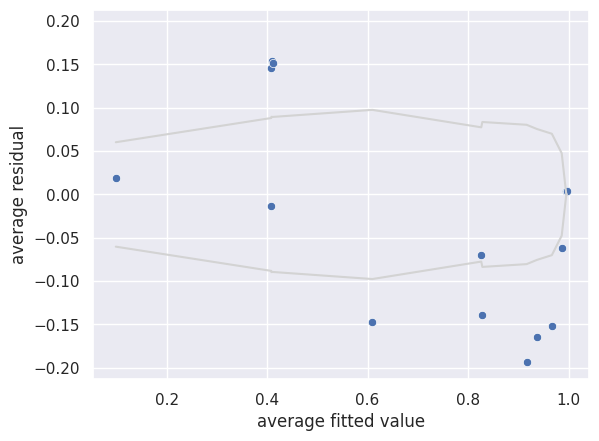

In [7]:
results_a.plot_residuals()

In [8]:
results_b = reg.logistic(data=data_df, formula='recommended ~ received_for_free + level_of_positivite')
results_b.micro_summary()

Optimization terminated successfully.
         Current function value: 0.063972
         Iterations 9


variable,coefficient,std error,p-value
received_for_free[T.True],1.862507,0.184830,0.000000
level_of_positivite,11.815706,0.320370,0.000000


4.17% of average residuals inside


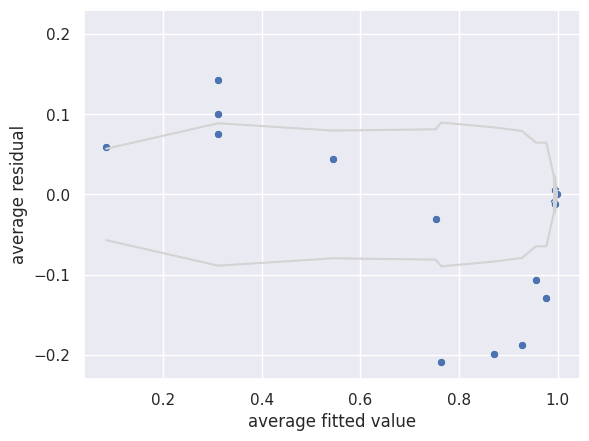

In [9]:
results_b.plot_residuals()

In [10]:
results_c = reg.linear(data=data_df, formula='author_num_reviews ~ periferia')
results_c.micro_summary()

variable,coefficient,std error,p-value
periferia,-4.788371,0.927767,0.000000


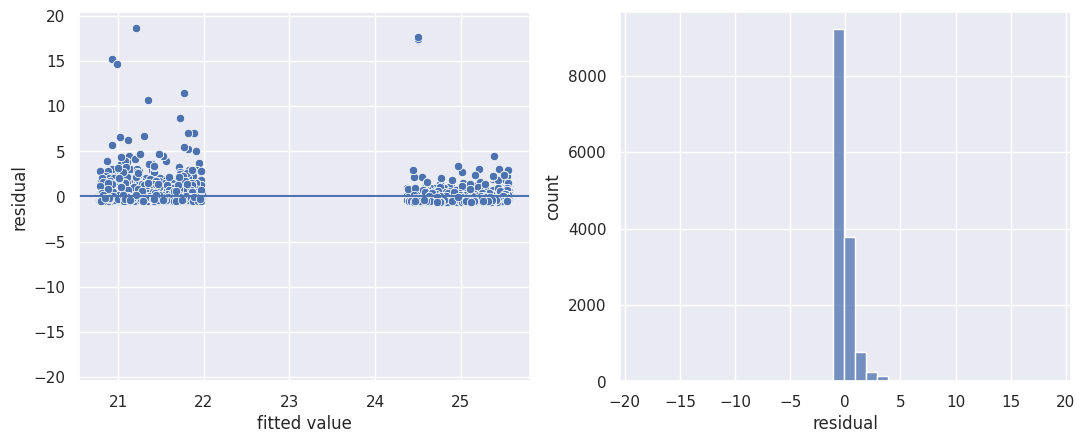

In [11]:
results_c.plot_residuals()

In [12]:
results_d = reg.linear(data=data_df, formula='author_num_reviews ~ coreness')
results_d.micro_summary()

variable,coefficient,std error,p-value
coreness,4.788371,0.927767,0.000000


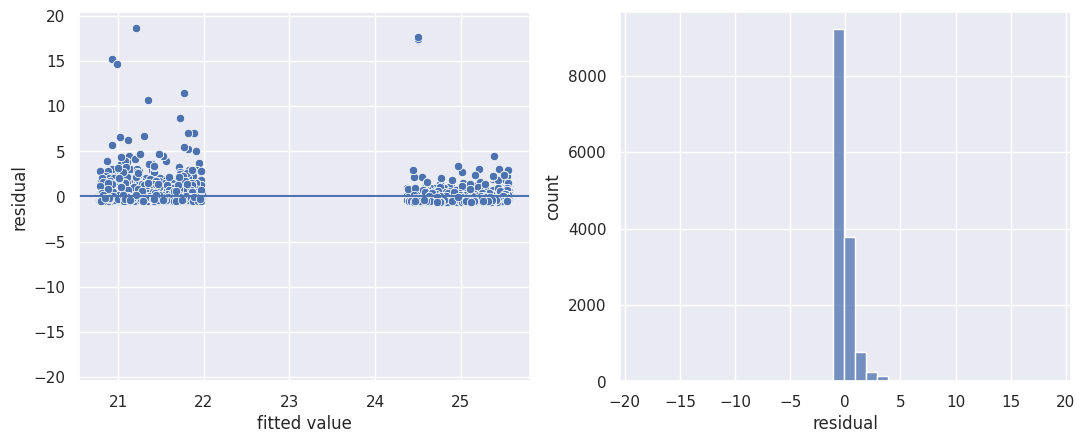

In [13]:
results_d.plot_residuals()

In [14]:
results_e = reg.logistic(data=data_df, formula='recommended ~ author_playtime_forever + received_for_free + level_of_positivite')
results_e.micro_summary()

Optimization terminated successfully.
         Current function value: 0.063971
         Iterations 9


variable,coefficient,std error,p-value
received_for_free[T.True],1.861959,0.184839,0.000000
author_playtime_forever,0.000001,0.000003,0.848551
level_of_positivite,11.817668,0.320584,0.000000


5.0% of average residuals inside


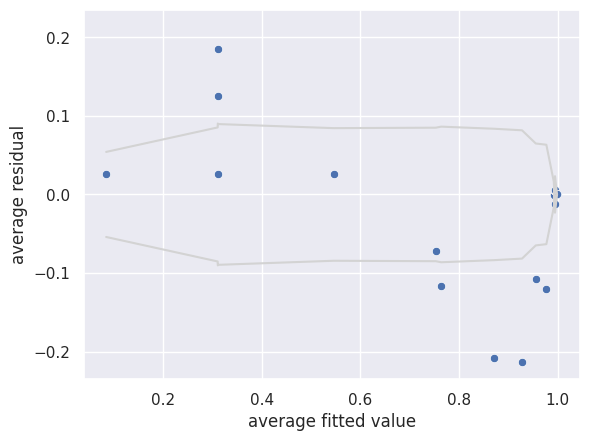

In [15]:
results_e.plot_residuals()

In [16]:
results_f = reg.linear(data=data_df, formula='author_num_reviews ~ coreness + periferia')
results_f.micro_summary()

variable,coefficient,std error,p-value
coreness,10.118580,0.531642,0.000000
periferia,5.330208,0.419274,0.000000


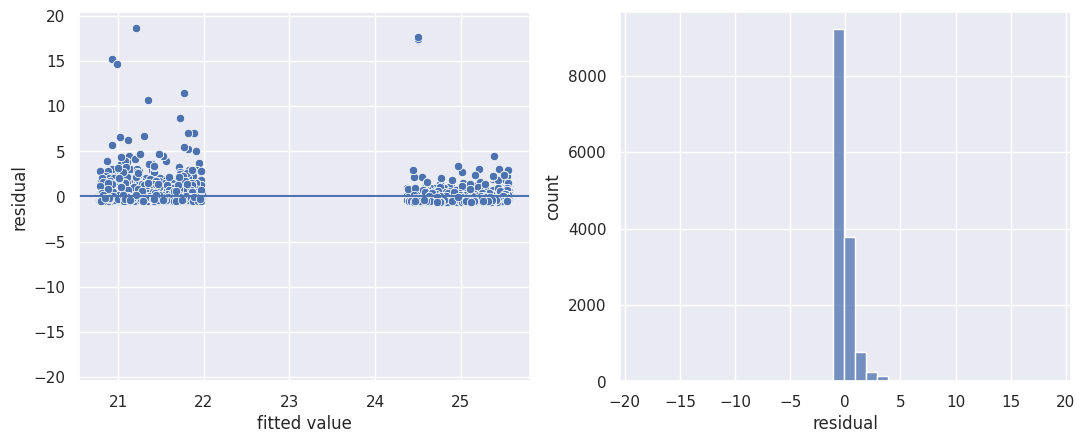

In [17]:
results_f.plot_residuals()

In [18]:
results_g = reg.linear(data=data_df, formula='coreness ~ author_playtime_forever')
results_g.micro_summary()

variable,coefficient,std error,p-value
author_playtime_forever,0.000002,0.000000,0.000000


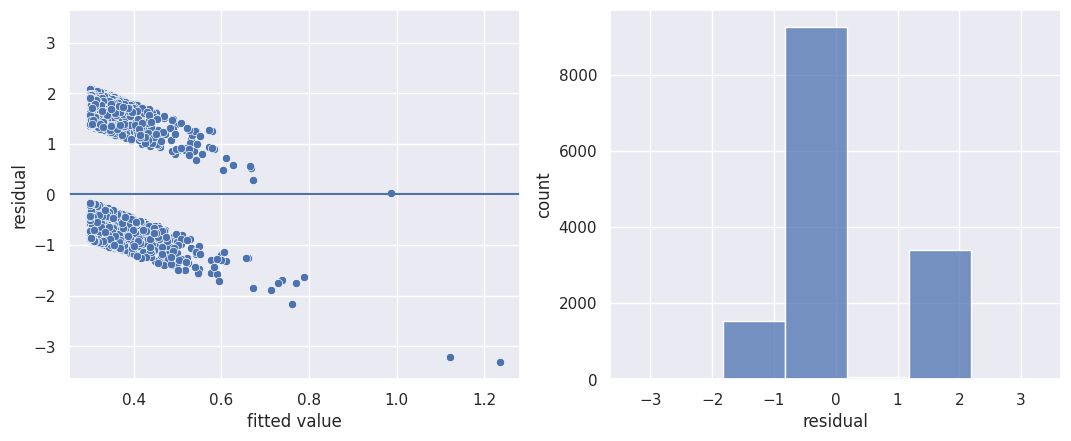

In [19]:
results_g.plot_residuals()